In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [7]:
df = pd.read_csv("7282_1.csv", sep=',')

In [8]:


highest_rating = df['reviews.rating'].max()

print(f"The highest rating observed in the 'reviews.rating' column is: {highest_rating}")
print(df['name'].count())

The highest rating observed in the 'reviews.rating' column is: 10.0
35912


C:\Users\souma\AppData\Local\Temp\ipykernel_29060\3422247713.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(


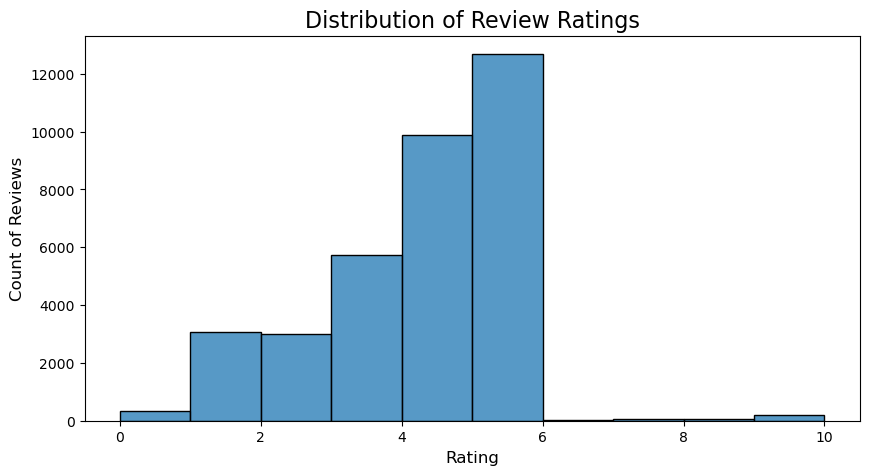

C:\Users\souma\AppData\Local\Temp\ipykernel_29060\3422247713.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


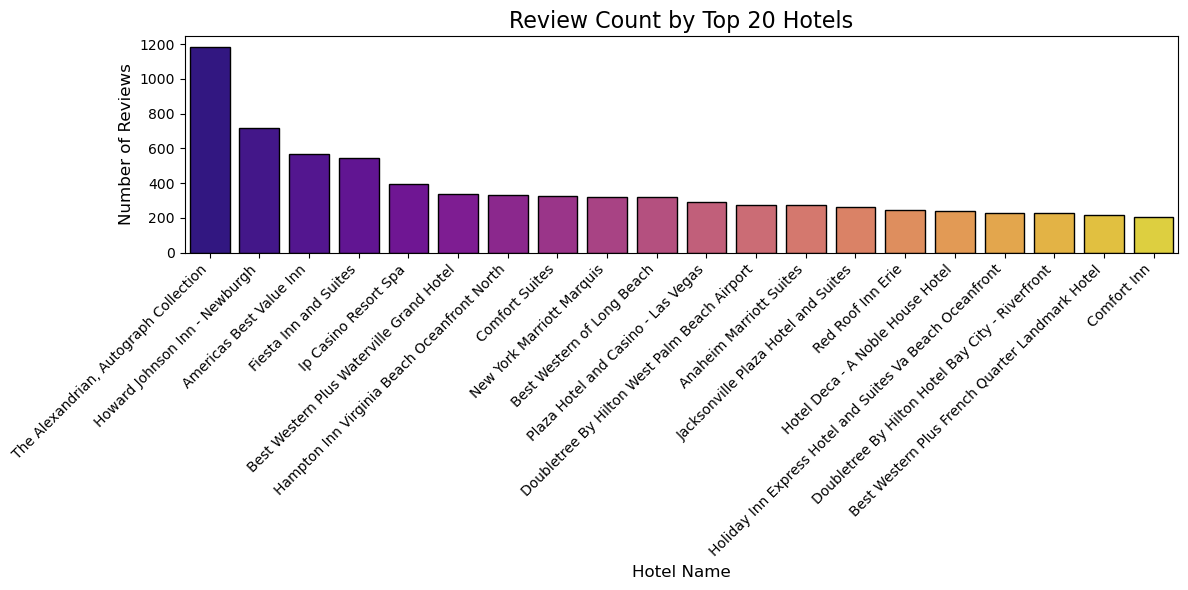

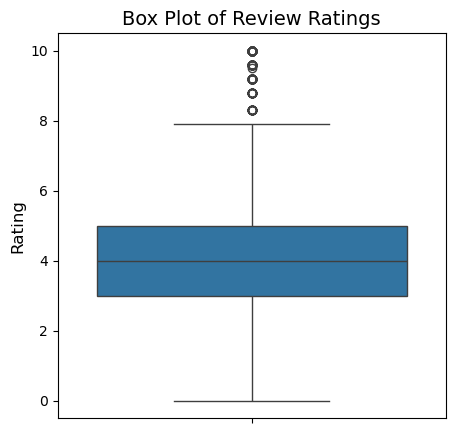

C:\Users\souma\AppData\Local\Temp\ipykernel_29060\3422247713.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


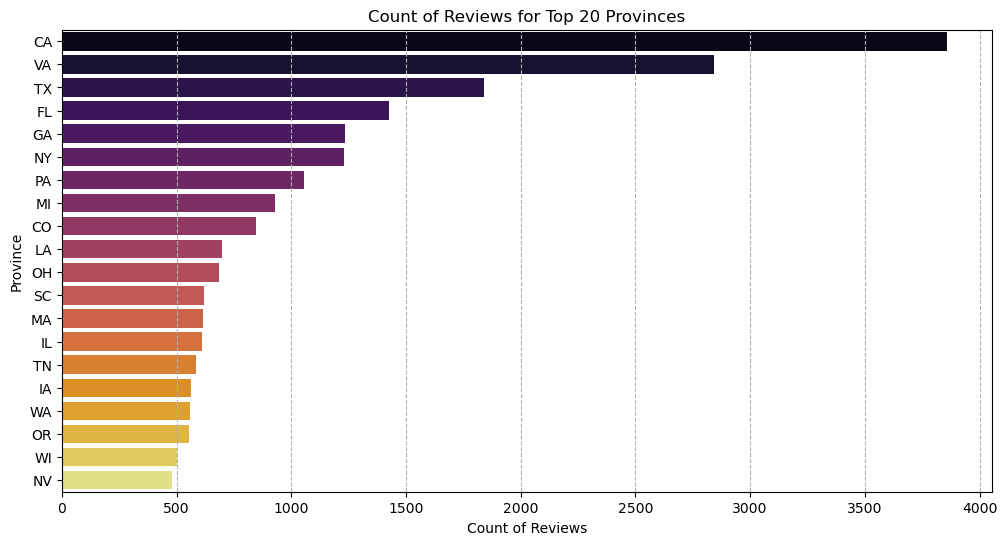

In [9]:

# --- 1. Numeric Feature: Reviews Rating (Target Variable) ---

# This is essential for understanding the distribution of sentiment.
plt.figure(figsize=(10, 5))

# Plot 1: Histogram/Count Plot for Reviews Rating
sns.histplot(
    data=df,
    x='reviews.rating',
    palette="viridis",
    bins=10,
    #kde=True,  # Kernel Density Estimate overlay, I will see if i want to add it later
    edgecolor="black"
)
plt.title('Distribution of Review Ratings', fontsize=16)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Count of Reviews', fontsize=12)
plt.show()

# --- 2. Categorical Feature: Top 10 Hotel Names ---

# Since 'name' has high cardinality (many unique hotels), we focus on the Top 20.
top_k = 20
top_hotels = df['name'].value_counts().nlargest(top_k)

plt.figure(figsize=(12, 6))
# Plot 2: Bar Chart for Top K Categories (Hotel Names)
sns.barplot(
    x=top_hotels.index, 
    y=top_hotels.values, 
    palette="plasma",
    edgecolor="black"
)

plt.title(f'Review Count by Top {top_k} Hotels', fontsize=16)
plt.xlabel('Hotel Name', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)
plt.xticks(rotation=45, ha='right') # Rotate labels for readability
plt.tight_layout()
plt.show()

# --- : Boxplot for Numeric Summary ---
# A boxplot is useful for spotting median, quartiles, and outliers (though less useful for integer ratings 1-5)
plt.figure(figsize=(5, 5))
sns.boxplot(y=df['reviews.rating'])
plt.title('Box Plot of Review Ratings', fontsize=14)
plt.ylabel('Rating', fontsize=12)
plt.show()

# --- 4. Univariate Analysis for Categorical Feature (province, States)---

# Get top 10 provinces
top_provinces = df['province'].value_counts().nlargest(top_k).index

plt.figure(figsize=(12, 6))

sns.countplot(
    data=df,
    y='province', 
    order=top_provinces, 
    palette='inferno'
)

plt.title(f'Count of Reviews for Top {top_k} Provinces')
plt.xlabel('Count of Reviews')
plt.ylabel('Province')
plt.grid(axis='x', linestyle='--')
plt.show()

